In [1]:
import pandas as pd

import matplotlib.pylab as plt
import matplotlib.dates as mdates

from datetime import datetime

import numpy as np

import seaborn as sns

from dateutil.relativedelta import relativedelta

In [2]:
df = pd.read_table('exp_data.txt',sep=',')

In [3]:
df.head()

,dt,finish_order
0,2019-05-13,15315.7
1,2019-05-14,15190.4
2,2019-05-15,15643.4
3,2019-05-16,17297.0
4,2019-05-17,18837.5


# 同比判断异常值

In [4]:
datetime.strptime(df.dt[0],'%Y-%m-%d') +relativedelta(days=-7)

datetime.datetime(2019, 5, 6, 0, 0)

In [5]:
#找到上周同比的日期
df['lastweek_day'] = [(datetime.strptime(d,'%Y-%m-%d').date() +relativedelta(days=-7)).strftime('%Y-%m-%d') for d in df.dt]




In [6]:
df['lastweek_value'] = -1

In [7]:
# 找到上周同比的值

for day in pd.date_range('2019-05-20','2019-07-03'):
    today = day.strftime('%Y-%m-%d')
    lastweek = (day-7).strftime('%Y-%m-%d')
    df.loc[df.dt==today,'lastweek_value'] = df.loc[df.dt==lastweek,'finish_order'].values


In [8]:
df['w2w'] = df.finish_order/df.lastweek_value-1

In [9]:
df.loc[df.dt>='2019-05-20'].head()

,dt,finish_order,lastweek_day,lastweek_value,w2w
7,2019-05-20,16387.7,2019-05-13,15315.7,0.069994
8,2019-05-21,16425.1,2019-05-14,15190.4,0.081282
9,2019-05-22,16234.2,2019-05-15,15643.4,0.037767
10,2019-05-23,17680.1,2019-05-16,17297.0,0.022148
11,2019-05-24,17703.3,2019-05-17,18837.5,-0.060210


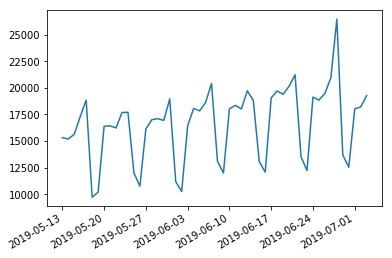

In [10]:
xs =  [datetime.strptime(d,'%Y-%m-%d').date() for d in df.dt]
zs = df.finish_order

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# Plot
#plt.plot(xs, ys)
plt.plot(xs,zs)
plt.xticks(pd.date_range('2019-05-13','2019-07-03',freq = '7D'))
plt.gcf().autofmt_xdate() # 自动旋转日期标记
plt.show()


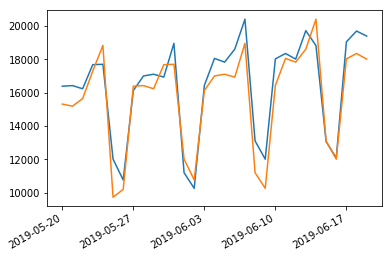

In [11]:
df2 = df.loc[(df.dt>='2019-05-20')&(df.dt<='2019-06-19')]

xs =  [datetime.strptime(d,'%Y-%m-%d').date() for d in df2.dt]
zs = df2.finish_order
ys = df2.lastweek_value
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# Plot
plt.plot(xs, zs)
plt.plot(xs,ys)
plt.xticks(pd.date_range('2019-05-20','2019-06-19',freq = '7D'))
plt.gcf().autofmt_xdate() # 自动旋转日期标记
plt.show()


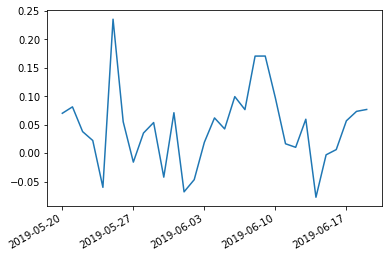

In [12]:


xs =  [datetime.strptime(d,'%Y-%m-%d').date() for d in df2.dt]
zs = df2.w2w
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# Plot
plt.plot(xs, zs,'-')

plt.xticks(pd.date_range('2019-05-20','2019-06-19',freq = '7D'))
plt.gcf().autofmt_xdate() # 自动旋转日期标记
plt.show()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


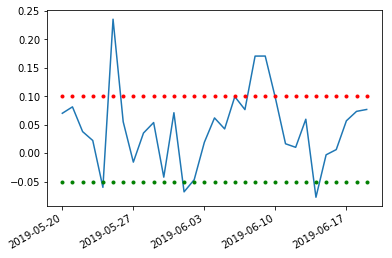

In [13]:
#添加阈值

df2['upper_range'] = 0.1
df2['lower_range'] = -0.05

xs =  [datetime.strptime(d,'%Y-%m-%d').date() for d in df2.dt]
zs = df2.w2w
us = df2.upper_range
ls = df2.lower_range
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# Plot
plt.plot(xs, zs,'-')
plt.plot(xs, us,'r.')
plt.plot(xs, ls,'g.')

plt.xticks(pd.date_range('2019-05-20','2019-06-19',freq = '7D'))
plt.gcf().autofmt_xdate() # 自动旋转日期标记
plt.show()


In [14]:
df2.shape


(31, 7)

In [15]:
#异常点个数
df2.loc[(df2.w2w>0.1)|(df2.w2w<-0.05)].shape

(6, 7)

In [16]:
df['upper_range'] = 0.1
df['lower_range'] = -0.05

In [17]:
df['is_abnormal'] = 0

In [18]:
df.loc[(df.w2w>=df.upper_range)|(df.w2w<=df.lower_range),'is_abnormal'] = 1

In [19]:
#观察6/20之后有多少异常点
df.loc[df.dt>='2019-06-20']

,dt,finish_order,lastweek_day,lastweek_value,w2w,upper_range,lower_range,is_abnormal
38,2019-06-20,20156.1,2019-06-13,19722.1,0.022006,0.1,-0.05,0
39,2019-06-21,21226.2,2019-06-14,18825.6,0.127518,0.1,-0.05,1
40,2019-06-22,13526.1,2019-06-15,13063.6,0.035404,0.1,-0.05,0
41,2019-06-23,12236.4,2019-06-16,12083.1,0.012687,0.1,-0.05,0
42,2019-06-24,19129.9,2019-06-17,19051.3,0.004126,0.1,-0.05,0
43,2019-06-25,18844.7,2019-06-18,19698.5,-0.043343,0.1,-0.05,0
44,2019-06-26,19476.0,2019-06-19,19395.9,0.004130,0.1,-0.05,0
45,2019-06-27,20942.8,2019-06-20,20156.1,0.039030,0.1,-0.05,0
46,2019-06-28,26443.9,2019-06-21,21226.2,0.245814,0.1,-0.05,1
47,2019-06-29,13687.8,2019-06-22,13526.1,0.011955,0.1,-0.05,0


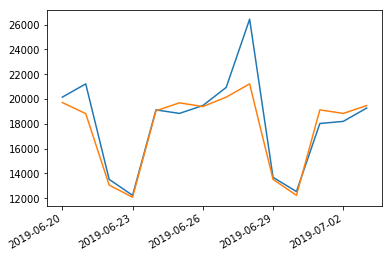

In [20]:
#绘制图像查看 6/20号之后的情况
df3 = df.loc[df.dt>='2019-06-20']

xs =  [datetime.strptime(d,'%Y-%m-%d').date() for d in df3.dt]
zs = df3.finish_order
ys = df3.lastweek_value
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# Plot
plt.plot(xs, zs)
plt.plot(xs,ys)
plt.xticks(pd.date_range('2019-06-20','2019-07-03',freq = '3D'))
plt.gcf().autofmt_xdate() # 自动旋转日期标记
plt.show()


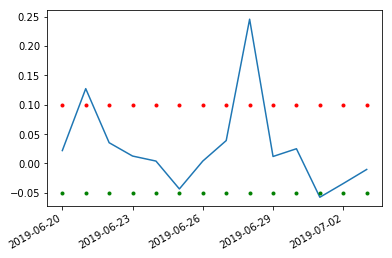

In [21]:
df3 = df.loc[df.dt>='2019-06-20']

xs =  [datetime.strptime(d,'%Y-%m-%d').date() for d in df3.dt]
zs = df3.w2w

us = df3.upper_range
ls = df3.lower_range

 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# Plot
plt.plot(xs, zs)
plt.plot(xs, us,'r.')
plt.plot(xs, ls,'g.')

plt.xticks(pd.date_range('2019-06-20','2019-07-03',freq = '3D'))
plt.gcf().autofmt_xdate() # 自动旋转日期标记
plt.show()


# 箱线图异常值检测

In [22]:
df.head()

,dt,finish_order,lastweek_day,lastweek_value,w2w,upper_range,lower_range,is_abnormal
0,2019-05-13,15315.7,2019-05-06,-1.0,-15316.7,0.1,-0.05,1
1,2019-05-14,15190.4,2019-05-07,-1.0,-15191.4,0.1,-0.05,1
2,2019-05-15,15643.4,2019-05-08,-1.0,-15644.4,0.1,-0.05,1
3,2019-05-16,17297.0,2019-05-09,-1.0,-17298.0,0.1,-0.05,1
4,2019-05-17,18837.5,2019-05-10,-1.0,-18838.5,0.1,-0.05,1


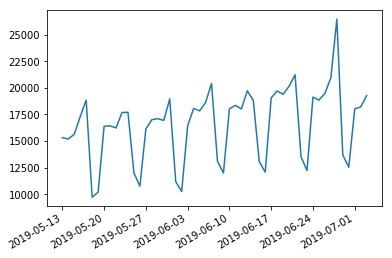

In [23]:
xs =  [datetime.strptime(d,'%Y-%m-%d').date() for d in df.dt]
zs = df.finish_order

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# Plot
#plt.plot(xs, ys)
plt.plot(xs,zs)
plt.xticks(pd.date_range('2019-05-13','2019-07-03',freq = '7D'))
plt.gcf().autofmt_xdate() # 自动旋转日期标记
plt.show()

In [24]:
#工作日与周末差异较大，需要分别处理

df['weekday'] = [datetime.strptime(d,'%Y-%m-%d').weekday()+1 for d in  df.dt]

df['is_workday'] = 1 
df.loc[df.weekday>=6,'is_workday'] = 0

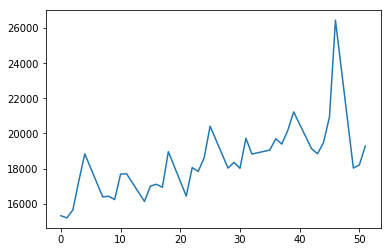

In [25]:
#仅绘制工作日，以下对工作日做异常值检测

df.loc[(df.is_workday==1)].finish_order.plot()

In [26]:
Q1 = np.percentile(df.loc[(df.is_workday==1)].finish_order,25)
Q3 = np.percentile(df.loc[(df.is_workday==1)].finish_order,75)

In [27]:
Q1,Q3

(17029.725, 19241.125)

In [28]:
IQR = Q3 - Q1

In [29]:
IQR

2211.4000000000015

In [30]:
Upper = Q3 + 1.5* IQR
Lower = Q1 - 1.5* IQR

In [31]:
#样本区间非常宽，仅能识别极端异常点
Upper,Lower

(22558.225000000002, 13712.624999999996)

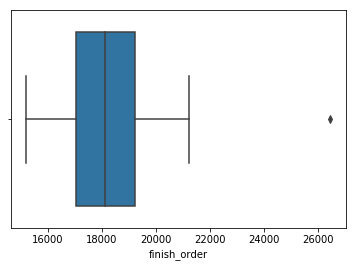

In [32]:
#绘图观察
sns.boxplot(df.loc[(df.is_workday==1)].finish_order)

# 标准差判定异常值

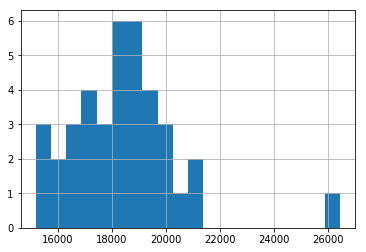

In [39]:
#绘制直方图观察，数据较为接近正态分布
df.loc[(df.is_workday==1)].finish_order.hist(bins=20)

In [40]:
#计算均值与标准差
mean = df.loc[(df.is_workday==1)].finish_order.mean()
std = df.loc[(df.is_workday==1)].finish_order.std()

mean,std

(18342.326315789473, 2029.360405656304)

In [44]:
#仅能识别极端异常值

upper_3std = mean + 3*std
lower_3std = mean - 3*std

upper_3std, lower_3std

(24430.407532758385, 12254.24509882056)

In [43]:

upper_2std = mean + 2*std
lower_2std = mean - 2*std

upper_2std, lower_2std

(22401.04712710208, 14283.605504476865)

In [45]:
#计算均值与标准差
mean = df.loc[(df.is_workday==1)&(df.finish_order<=25000)].finish_order.mean()
std = df.loc[(df.is_workday==1)&(df.finish_order<=25000)].finish_order.std()

mean,std

(18123.364864864863, 1536.2997282822519)

In [46]:

upper_2std = mean + 2*std
lower_2std = mean - 2*std

upper_2std, lower_2std

(21195.96432142937, 15050.76540830036)

In [47]:
df.loc[(df.is_workday==1)&(df.finish_order<=25000)].finish_order.max()

21226.2